# Exploratory Data Analysis (EDA) for XYZ in Cab Industry

In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import ydata_profiling as yp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [52]:
df_cab_data = pd.read_csv('Cab_Data.csv')
df_city = pd.read_csv('City.csv')
df_customer_id = pd.read_csv('Customer_ID.csv')
df_transaction_id = pd.read_csv('Transaction_ID.csv')

## 1. Profile Report for Cab Data

### 1.1 Basic Information

In [47]:
df_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


### 1.2 Interactie Profile Report

## 2. Profile Report for City

### 2.1 Basic Information

In [48]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


### 2.2 Interactive Profile Report

## 3. Profile Report for Customer ID

### 3.1 Basic Information

In [49]:
df_customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### 3.2 Interactive Profile Report

## 4. Profile Report for Transcation ID

### 4.1 Basic Information

In [50]:
df_transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


### 4.2 Interactive Profile Report

In [54]:
# As there's no missing value, directely join dataframe.
df_trans_cust = df_transaction_id.join(df_customer_id.set_index('Customer ID'), on=df_transaction_id['Customer ID'])
df_cab_trans_cust = df_cab_data.join(df_trans_cust.set_index('Transaction ID'), on=df_cab_data['Transaction ID'] )
df = df_cab_trans_cust.join(df_city.set_index('City'), on=df_cab_trans_cust['City'])
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [23]:
# Checking duplicates
print('Number of duplicates: ', np.sum(df.duplicated()))

Number of duplicates:  0


In [99]:
df_pink = df[df['Company']=='Pink Cab']
df_yellow = df[df['Company']=='Yellow Cab']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84711 entries, 0 to 357453
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction ID      84711 non-null  int64         
 1   Date of Travel      84711 non-null  datetime64[ns]
 2   Company             84711 non-null  object        
 3   City                84711 non-null  object        
 4   KM Travelled        84711 non-null  float64       
 5   Price Charged       84711 non-null  float64       
 6   Cost of Trip        84711 non-null  float64       
 7   Customer ID         84711 non-null  int64         
 8   Payment_Mode        84711 non-null  object        
 9   Gender              84711 non-null  object        
 10  Age                 84711 non-null  int64         
 11  Income (USD/Month)  84711 non-null  int64         
 12  Population          84711 non-null  object        
 13  Users               84711 non-null  object   

In [100]:
df_yellow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274681 entries, 233 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      274681 non-null  int64         
 1   Date of Travel      274681 non-null  datetime64[ns]
 2   Company             274681 non-null  object        
 3   City                274681 non-null  object        
 4   KM Travelled        274681 non-null  float64       
 5   Price Charged       274681 non-null  float64       
 6   Cost of Trip        274681 non-null  float64       
 7   Customer ID         274681 non-null  int64         
 8   Payment_Mode        274681 non-null  object        
 9   Gender              274681 non-null  object        
 10  Age                 274681 non-null  int64         
 11  Income (USD/Month)  274681 non-null  int64         
 12  Population          274681 non-null  object        
 13  Users               274681 

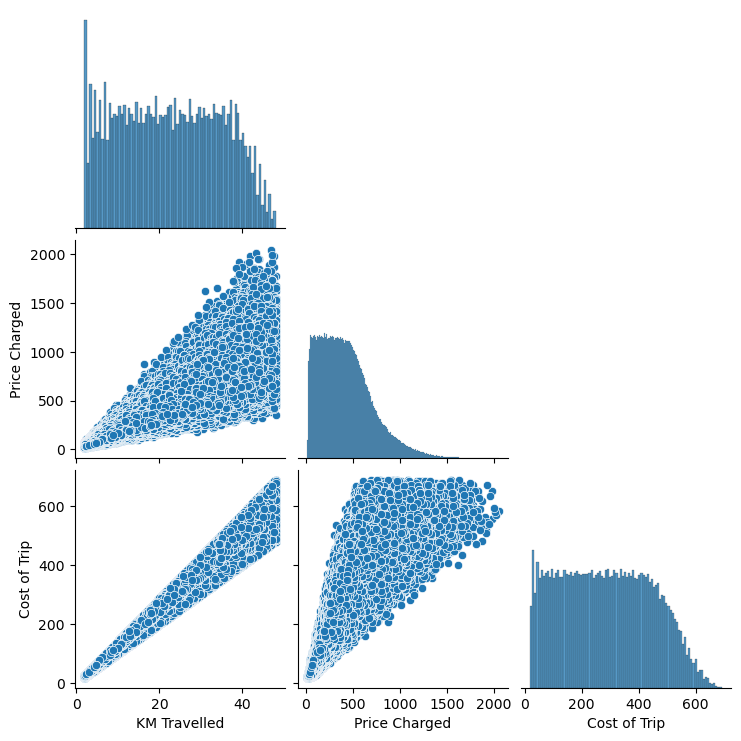

In [61]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
sns.pairplot(data = df[['KM Travelled', 'Price Charged', 'Cost of Trip']], corner = True)
plt.show()

Total transactions of each cab companies

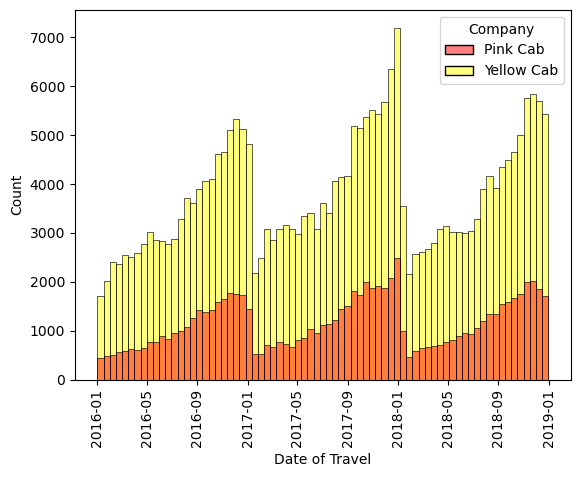

<AxesSubplot:xlabel='Company'>

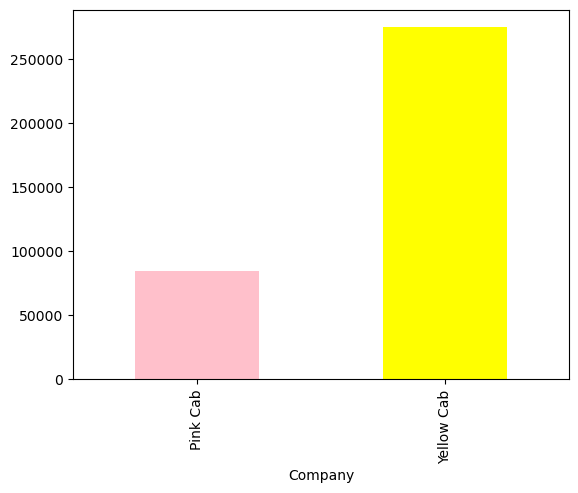

In [64]:
sns.histplot(data=df, x='Date of Travel', hue='Company', palette=['red', 'yellow'])
plt.xticks(rotation=90)
plt.show()
df.groupby(['Company']).size().plot(kind='bar', color=['pink', 'yellow'])

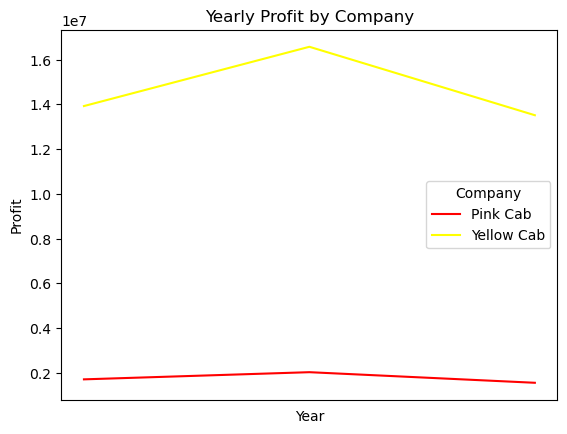

In [126]:
#profit analysis
df_grouped_Y = df.groupby([pd.Grouper(key='Date of Travel', freq='Y'), 'Company'])['Profit'].sum().reset_index()
sns.lineplot(data=df_grouped_Y,x=pd.to_datetime([2016, 2016,2017, 2017,2018, 2018]), y='Profit', hue='Company', palette=['red', 'yellow'])
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Yearly Profit by Company')
plt.show()

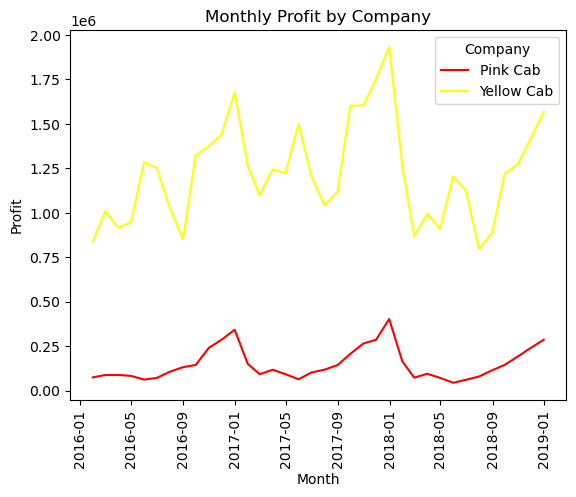

In [125]:
df_grouped_M = df.groupby([pd.Grouper(key='Date of Travel', freq='M'), 'Company'])['Profit'].sum().reset_index()
sns.lineplot(data=df_grouped_M,x='Date of Travel', y='Profit', hue='Company', palette=['red', 'yellow'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Profit by Company')
plt.show()

In [102]:
pink_profit= df_pink.groupby([pd.Grouper(key='Date of Travel')])['Profit'].sum()
yellow_profit= df_yellow.groupby([pd.Grouper(key='Date of Travel')])['Profit'].sum()
print(pink_profit.sum(), yellow_profit.sum())

5307328.3209999995 44020373.1708


Payment modes

<AxesSubplot:xlabel='Company', ylabel='count'>

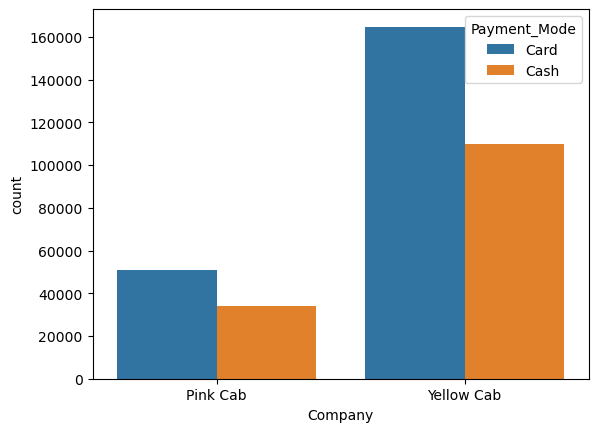

In [39]:
sns.countplot(x="Company", hue="Payment_Mode", data=df)

User number in different city

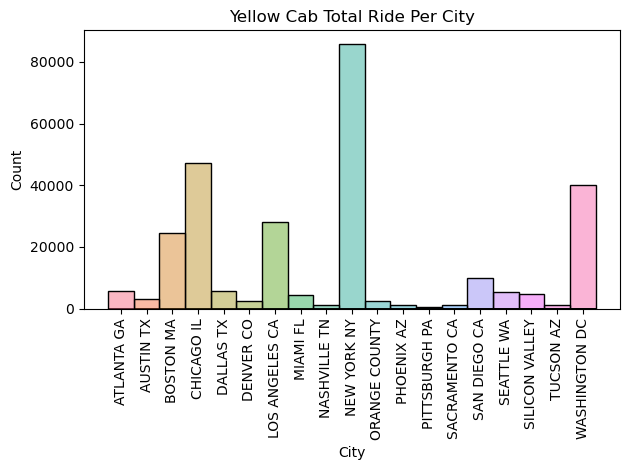

In [128]:
#yellow cab
sns.histplot(data=df_yellow, x='City', hue='Users', legend=False)
plt.xticks(rotation=90)
plt.title('Yellow Cab Total Ride Per City')
plt.tight_layout()
plt.show()

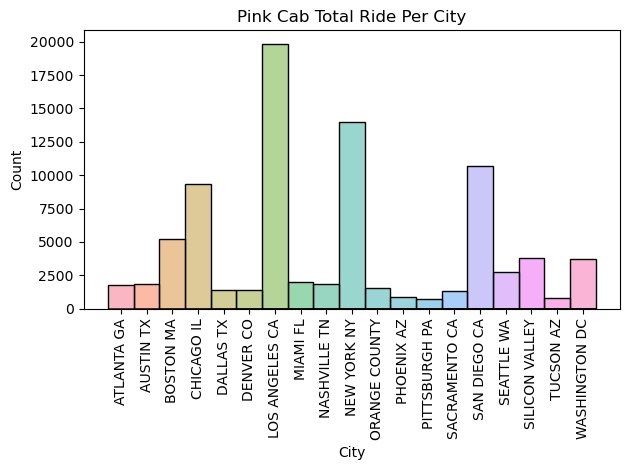

In [129]:
sns.histplot(data=df_pink, x='City', hue='Users', legend=False)
plt.xticks(rotation=90)
plt.title('Pink Cab Total Ride Per City')
plt.tight_layout()
plt.show()

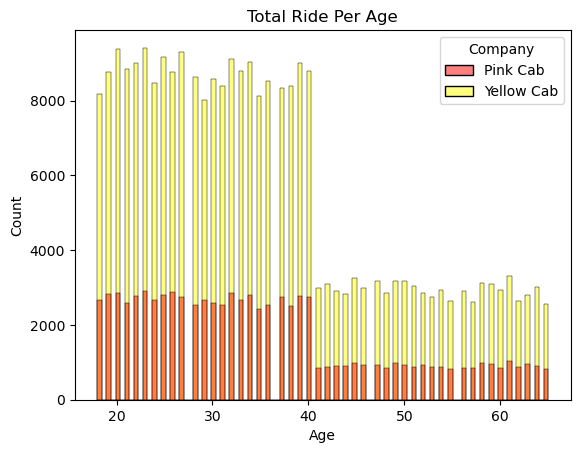

In [135]:
#Age of cab riders
sns.histplot(data=df, x='Age', hue='Company', palette=['red', 'yellow'])
plt.title('Total Ride Per Age')
plt.show()